Importing the required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Reading the dataset

In [2]:
url = "https://introtomlsampledata.blob.core.windows.net/data/nyc-taxi/nyc-taxi-sample-data.csv"
df = pd.read_csv(url)

In [3]:
df.shape

(11734, 14)

In [4]:
df.head()

,vendorID,passengerCount,tripDistance,hour_of_day,day_of_week,day_of_month,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
0,1,1,9.40,15,2,27,1,None,False,29.058824,24.0,3.0,6.185714,44.30
1,2,5,14.75,13,4,15,1,None,False,0.000000,6.0,0.0,4.571930,44.80
2,2,1,3.35,23,4,8,1,None,False,0.000000,1.0,0.0,4.384091,18.96
3,2,1,3.33,18,2,27,1,None,False,29.058824,24.0,3.0,6.185714,16.30
4,2,1,0.47,17,6,3,1,None,False,0.000000,1.0,0.0,3.846429,5.30


In [5]:
df.normalizeHolidayName.unique()

array(['None', 'Martin Luther King, Jr. Day', "New Year's Day",
       "Washington's Birthday", 'Memorial Day'], dtype=object)

Replacing normalizeHolidayName string values with integers, as strings are not accepted sklearn.linear_model.

Ideally, we should one hot encode it, but for the sake of this lab, only replacing with integers.

In [6]:
replace_dict = {'None': 0, 'Martin Luther King, Jr. Day': 1, "New Year's Day": 2,
       "Washington's Birthday": 3, 'Memorial Day': 4}
df.normalizeHolidayName=df.normalizeHolidayName.replace(replace_dict)
df.normalizeHolidayName.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [7]:
df.describe()

,vendorID,passengerCount,tripDistance,hour_of_day,day_of_week,day_of_month,month_num,normalizeHolidayName,snowDepth,precipTime,precipDepth,temperature,totalAmount
count,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000
mean,1.790608,1.348560,2.866139,13.633884,3.223879,15.000256,3.502898,0.052241,1.609015,12.028379,190.782342,10.314244,14.733528
std,0.406892,1.016123,2.905810,6.670530,1.961855,8.467892,1.707729,0.388510,7.146771,10.158597,1211.087724,8.500600,10.983099
min,1.000000,1.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-13.379464,3.300000
25%,2.000000,1.000000,1.060000,9.000000,2.000000,8.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.566372,8.150000
50%,2.000000,1.000000,1.900000,15.000000,3.000000,15.000000,4.000000,0.000000,0.000000,6.000000,3.000000,10.318229,11.300000
75%,2.000000,1.000000,3.620000,19.000000,5.000000,22.000000,5.000000,0.000000,0.000000,24.000000,41.000000,17.239744,17.800000
max,2.000000,6.000000,62.550000,23.000000,6.000000,30.000000,6.000000,4.000000,67.090909,24.000000,9999.000000,26.524107,339.380000


In [8]:
X = df.loc[:,df.columns!="totalAmount"]
X.shape

(11734, 13)

In [9]:
y = df.pop("totalAmount")
y.shape

(11734,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

4.729889435086086
[-1.11075168e-01  2.96569020e-02  3.48968985e+00  3.63774740e-02
 -9.74038828e-02 -5.61825862e-03 -1.31295419e-02 -2.34404120e-01
 -4.62059415e-01  4.48175038e-03  6.81548810e-03 -4.19417211e-05
  5.77693516e-03]


In [13]:
y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3184,27.36,28.802749
7550,10.30,11.209055
9090,12.36,9.754367
2627,10.30,10.975948
2456,14.30,16.770612
...,...,...
3114,4.80,5.891393
4960,17.30,22.135783
9380,8.80,10.089930
3378,35.80,41.486233


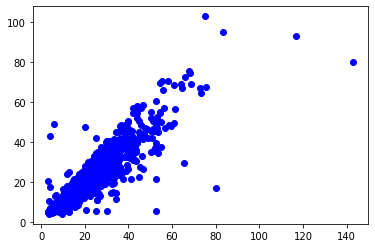

In [15]:
plt.scatter(y_test, y_pred,  color='blue')
plt.show()


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of Determination (R^2):', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2.1950859013039343
Mean Squared Error: 15.575372060215598
Root Mean Squared Error: 3.946564589641933
Coefficient of Determination (R^2): 0.8480659971037469
